In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import sklearn as skl
import random
import sklearn.linear_model
import statsmodels.api as sm

from matplotlib import pyplot as plt

random.seed(42)
np.random.seed(42)

### R vs (p)ppGpp Function

In [2]:
ppGpp_RNA_Prot_data_wu = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Wu_and_Balakrishnan_ppGpp_R.csv",)

In [3]:
R_max = 0.793

def hill_fn_n1(g, k, R_0, n=1, R_max=R_max):
    return ((k/((g**n)+k))*(R_max-R_0)) + R_0

def inverse_fn(g, a):
    return a/g

## fitting k to the restricted model
initial_guess = [1,0]
wu_params_n1, covariance = sp.optimize.curve_fit(hill_fn_n1, ppGpp_RNA_Prot_data_wu["g"], ppGpp_RNA_Prot_data_wu[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

initial_guess = [1]
params_inv, covariance = sp.optimize.curve_fit(inverse_fn, ppGpp_RNA_Prot_data_wu["g"], ppGpp_RNA_Prot_data_wu[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

/tmp/ipykernel_112262/3381558726.py:7: RuntimeWarning: divide by zero encountered in divide
  return a/g


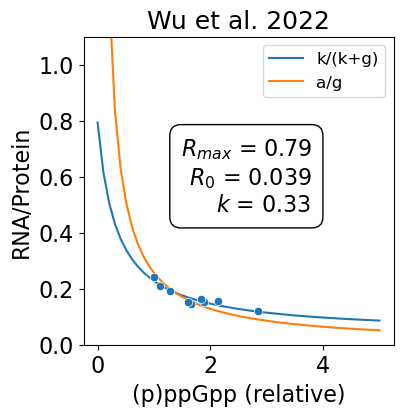

In [4]:
fig = plt.figure(figsize=(4,4))
xlinspace = np.linspace(0,5)
y_n1 = hill_fn_n1(xlinspace,*wu_params_n1)
y_inv = inverse_fn(xlinspace,*params_inv)
sns.scatterplot(data = ppGpp_RNA_Prot_data_wu,x="g",y=r"RNA/Protein", zorder=1)
plt.plot(xlinspace,y_n1,label="k/(k+g)", zorder=-1)
plt.plot(xlinspace,y_inv,label="a/g", zorder=-1)

plt.title("Wu et al. 2022",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel(r"(p)ppGpp (relative)",fontsize=16)
plt.legend(fontsize=12)

plt.text(3.8,0.6,r"$R_{max}$ = " + f"{R_max:.2n}" + "\n" +\
         r"$R_{0}$ = " + f"{wu_params_n1[1]:.2n}" + "\n" +\
         r"$k$ = " + f"{wu_params_n1[0]:.2n}",horizontalalignment="right",\
        verticalalignment="center",fontsize=16,\
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# plt.xlim(0,1000)
plt.ylim(0,1.1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/Wu_R_to_g_Model.png",dpi=300,bbox_inches="tight")

In [5]:
### aggregate cremer data, bin by growth rate

In [6]:
cremer_rnaprot = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Chure_and_Cremer_2023_RNAProt.csv")
cremer_ppGpp = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Chure_and_Cremer_2023_ppGpp.csv")

In [7]:
cremer_rnaprot["Growth Bin"] = pd.cut(cremer_rnaprot["growth_rate_hr"],np.linspace(0,2,num=21))
cremer_ppGpp["Growth Bin"] = pd.cut(cremer_ppGpp["growth_rate_hr"],np.linspace(0,2,num=21))

In [8]:
mean_rnaprot = cremer_rnaprot.groupby("Growth Bin")["RNA/Protein"].mean()
mean_relppGpp = cremer_ppGpp.groupby("Growth Bin")["relative_ppGpp"].mean()
agg_df = pd.concat([mean_rnaprot,mean_relppGpp], axis=1).reset_index()
agg_df = agg_df.dropna()

/tmp/ipykernel_112262/4166162074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rnaprot = cremer_rnaprot.groupby("Growth Bin")["RNA/Protein"].mean()
/tmp/ipykernel_112262/4166162074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_relppGpp = cremer_ppGpp.groupby("Growth Bin")["relative_ppGpp"].mean()


In [9]:
def hill_fn_n1(g, k, R_0, n=1, R_max=R_max):
    return ((k/((g**n)+k))*(R_max-R_0)) + R_0

def inverse_fn(g, a):
    return a/g

## fitting k to the restricted model
initial_guess = [1,0]
params_n1, covariance = sp.optimize.curve_fit(hill_fn_n1, agg_df["relative_ppGpp"], agg_df[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

initial_guess = [1]
params_inv, covariance = sp.optimize.curve_fit(inverse_fn, agg_df["relative_ppGpp"], agg_df[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

/tmp/ipykernel_112262/4143814451.py:5: RuntimeWarning: divide by zero encountered in divide
  return a/g


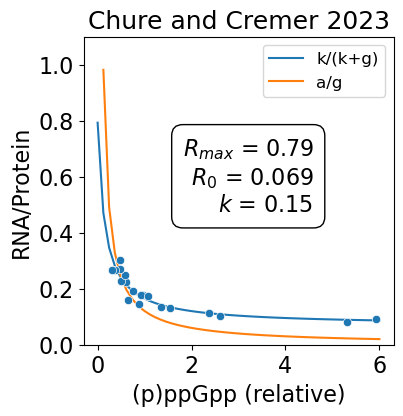

In [10]:
fig = plt.figure(figsize=(4,4))
xlinspace = np.linspace(0,6)
y_n1 = hill_fn_n1(xlinspace,*params_n1)
y_inv = inverse_fn(xlinspace,*params_inv)
sns.scatterplot(data = agg_df,x="relative_ppGpp",y=r"RNA/Protein", zorder=1)
plt.plot(xlinspace,y_n1,label="k/(k+g)", zorder=-1)
plt.plot(xlinspace,y_inv,label="a/g", zorder=-1)
plt.title("Chure and Cremer 2023",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("(p)ppGpp (relative)",fontsize=16)
plt.legend(fontsize=12)

plt.text(4.6,0.6,r"$R_{max}$ = " + f"{R_max:.2n}" + "\n" +\
         r"$R_{0}$ = " + f"{params_n1[1]:.2n}" + "\n" +\
         r"$k$ = " + f"{params_n1[0]:.2n}",horizontalalignment="right",\
        verticalalignment="center",fontsize=16,\
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# plt.xlim(0,1000)
plt.ylim(0,1.1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/Cremer_R_to_g_Model.png",dpi=300,bbox_inches="tight")

### Justifying H(g)=R0

In [11]:
Growth_RNA_Prot_data = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Dai_2016_Growth_R.csv")
Growth_RNA_Prot_data_fast = Growth_RNA_Prot_data[Growth_RNA_Prot_data["Growth Rate (1/h)"]>0.75]
R_line = skl.linear_model.LinearRegression().fit(Growth_RNA_Prot_data_fast["Growth Rate (1/h)"].values[:,np.newaxis],Growth_RNA_Prot_data_fast["RNA/Protein"].values)

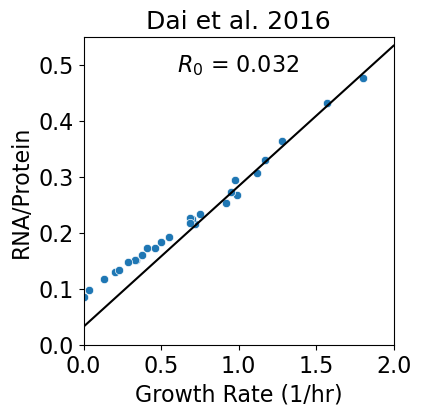

In [12]:
fig = plt.figure(figsize=(4,4))
R_line_x = np.linspace(0,2)
R_line_y = R_line.predict(R_line_x[:,np.newaxis])
plt.plot(R_line_x,R_line_y,color="black")
sns.scatterplot(data = Growth_RNA_Prot_data,x="Growth Rate (1/h)",y="RNA/Protein", zorder=1)
plt.title("Dai et al. 2016",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.text(1,0.5,r"$R_{0}$ = " + f"{R_line.intercept_:.2n}",horizontalalignment="center",\
        verticalalignment="center",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,0.55)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/min_R0.png",dpi=300,bbox_inches="tight")

In [13]:
Growth_RNA_Prot_inactive_data = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Dai_2016_Rinavtive.csv")
Growth_RNA_Prot_inactive_data_fast = Growth_RNA_Prot_inactive_data[Growth_RNA_Prot_inactive_data["Growth Rate (1/hr)"]>0.5]
rna_prot_inactive = np.mean(Growth_RNA_Prot_inactive_data_fast["RNA/Protein (inactive)"])

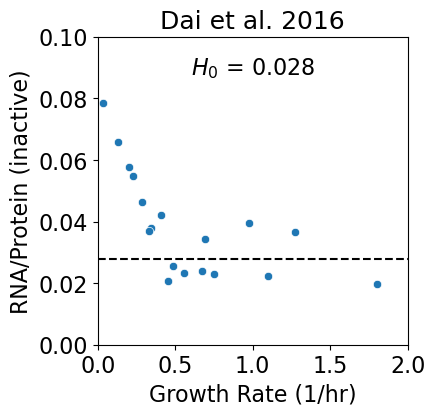

In [14]:
fig = plt.figure(figsize=(4,4))
# R_line_x = np.linspace(0,2)
# R_line_y = R_line.predict(R_line_x[:,np.newaxis])
plt.title("Dai et al. 2016",fontsize=18)
sns.scatterplot(data = Growth_RNA_Prot_inactive_data,x="Growth Rate (1/hr)",y="RNA/Protein (inactive)", zorder=1)
plt.hlines(rna_prot_inactive,0,2,color="black",linestyle="--")

# plt.title("Ryals et al. 1982",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein (inactive)",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.text(1,0.09,r"$H_{0}$ = " + f"{rna_prot_inactive:.2n}",horizontalalignment="center",\
        verticalalignment="center",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,0.1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/min_H0.png",dpi=300,bbox_inches="tight")

### RNA/Protein and Kn are Linear

In [15]:
def fit_reg(df,bootstrap=True,nbootstraps=10000,ci=90):
    #replace r squared with a more meaningful metric like rss or smthn
    
    growth_vals = df["Growth rate λ (1/h)"].values
    R_vals = df["RNA/Protein (μg/μg)"].values
    
    reg_model = skl.linear_model.LinearRegression()
    reg_model.fit(growth_vals.reshape(-1,1),R_vals)
    slope,intercept = reg_model.coef_[0],reg_model.intercept_
    r2 = reg_model.score(growth_vals.reshape(-1,1),R_vals)
    
    residuals = reg_model.predict(growth_vals.reshape(-1,1))-R_vals
    mean_abs_residual = np.mean(np.abs(residuals))
    
    if bootstrap:
        reg_model = skl.linear_model.LinearRegression()
        X = growth_vals
        y = R_vals
        bootstrap_idx = np.random.choice(range(X.shape[0]), size=(nbootstraps,X.shape[0]))
        boot_X = X[bootstrap_idx]
        boot_y = y[bootstrap_idx]
        
        num = np.sum((boot_X-np.mean(boot_X,axis=1)[:,np.newaxis])*(boot_y-np.mean(boot_y,axis=1)[:,np.newaxis]),axis=1)
        denom = np.sum((boot_X-np.mean(boot_X,axis=1)[:,np.newaxis])**2,axis=1)
        slopes = num/denom
        slope_diffs = np.abs(slopes-slope)
        slope_diff_ci = np.nanpercentile(slope_diffs,ci)
        output = pd.Series({"Slope":slope, "Intercept":intercept, "R2":r2, "Mean Abs Residual": mean_abs_residual, "CI": slope_diff_ci})
    else:
        output = pd.Series({"Slope":slope, "Intercept":intercept, "R2":r2, "Mean Abs Residual": mean_abs_residual})
    return output
    
def kn_growth_mm(kappa_n):
    max_gr = 2.85
    kappa_t = 4.5
    gr = max_gr*((kappa_n)/(kappa_n+kappa_t))
    return gr

def inv_kn_growth_mm(gr):
    max_gr = 2.85
    kappa_t = 4.5
    frac_max_gr = gr/max_gr
    kappa_n = (frac_max_gr/(1-frac_max_gr))*kappa_t
    return kappa_n

In [16]:
def fit_weighted_reg(df):
    #replace r squared with a more meaningful metric like rss or smthn
    
    growth_vals = df["Growth rate λ (1/h)"].values[:,np.newaxis]
    R_vals = df["RNA/Protein (μg/μg)"].values
    R_stderr = df["RNA/Protein (μg/μg) stderr"].values

    reg_model = sm.WLS(R_vals, sm.add_constant(growth_vals), weights=1.0 / (R_stderr ** 2)).fit()
    intercept,slope = reg_model.params
    intercept_95ci,slope_95ci = reg_model.conf_int()[0],reg_model.conf_int()[1]
    output = pd.Series({"Slope":slope, "Intercept":intercept,\
                        "Intercept 95CI Lower":intercept_95ci[0], "Intercept 95CI Upper":intercept_95ci[1],\
                       "Slope 95CI Lower":slope_95ci[0],"Slope 95CI Upper":slope_95ci[1]})
    return output

In [17]:
scott_data = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Scott_2010_Table_S3.csv")
# fast_scott_data = scott_data.groupby("Medium").apply(lambda x: x.sort_values("Growth rate λ (1/h)")[-4:]).set_index("Medium")
scott_baseline = scott_data[scott_data["Chlor Conc (μM)"] == 0]
scott_baseline = scott_baseline.set_index("Medium")

# scott_regs = scott_data.groupby("Medium").apply(lambda x: fit_weighted_reg(x))
scott_regs = scott_data.groupby("Medium").apply(lambda x: fit_weighted_reg(x))

Kn = -1/scott_regs["Slope"]
Kn_95CI_lower = -1/scott_regs["Slope 95CI Lower"]
Kn_95CI_upper = -1/scott_regs["Slope 95CI Upper"]
scott_Rmax = scott_regs["Intercept"]

scott_regs = Kn.to_frame().rename(columns={"Slope":"Kn"})
scott_regs["Rmax"] = scott_Rmax
scott_regs["Kn 95CI Lower"] = Kn_95CI_lower
scott_regs["Kn 95CI Upper"] = Kn_95CI_upper
scott_regs["Kn stderr"] = (Kn_95CI_upper - Kn_95CI_lower)/2

scott_regs = pd.concat([scott_baseline,scott_regs],axis=1)

baseline_model = sm.WLS(scott_baseline["RNA/Protein (μg/μg)"].values, sm.add_constant(scott_baseline["Growth rate λ (1/h)"].values[:,np.newaxis]), weights=1.0 / (scott_baseline["RNA/Protein (μg/μg) stderr"].values ** 2)).fit()
kn_model = sm.WLS(scott_regs["Kn"].values, sm.add_constant(scott_regs["RNA/Protein (μg/μg)"].values[:,np.newaxis]), weights=1.0 / (scott_regs["Kn stderr"].values ** 2)).fit()

/tmp/ipykernel_112262/3353527982.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scott_regs = scott_data.groupby("Medium").apply(lambda x: fit_weighted_reg(x))


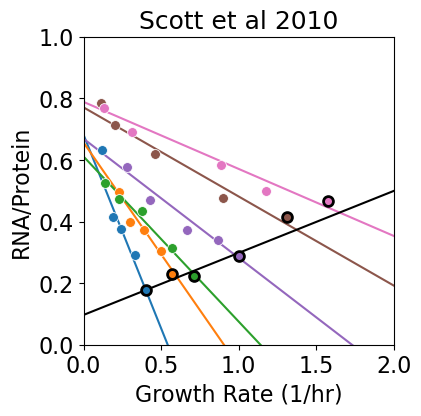

In [18]:
medium_color_dict = {'M63+glyc':'tab:blue', 'M63+gluc':'tab:orange', 'cAA+glyc':'tab:green',\
                     'cAA+gluc':'tab:purple', 'RDM+glyc':'tab:brown','RDM+gluc':'tab:pink'}

fig = plt.figure(figsize=(4,4))

plt.title("Scott et al 2010",fontsize=18)

grlinspace = np.linspace(0,2)
for medium in scott_data["Medium"].unique():
    scott_subset = scott_data[scott_data["Medium"]==medium]
    linear_model = scott_regs.loc[medium]
    knline = linear_model["Rmax"]-(linear_model["Kn"]**-1)*grlinspace
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_subset,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-10,s=50,color=medium_color)
    sns.scatterplot(data = linear_model.to_frame().T,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-9,s=50,\
                    color=medium_color,edgecolor="black",linewidth=2)
    plt.plot(grlinspace,knline,color=medium_color,zorder=-13)
    
baseline_trace = baseline_model.predict(sm.add_constant(grlinspace[:,np.newaxis]))
plt.plot(grlinspace,baseline_trace,color="black",zorder=-12)

plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_RvsGR.png",dpi=300,bbox_inches="tight")

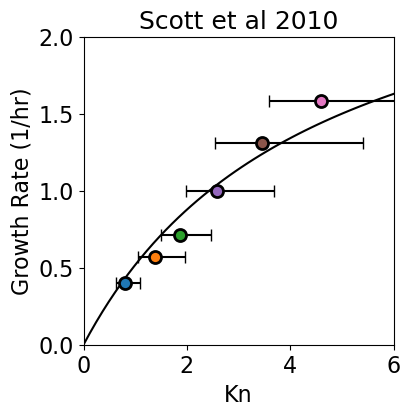

In [19]:
fig = plt.figure(figsize=(4,4))
plt.title("Scott et al 2010",fontsize=18)

knlinspace = np.linspace(0,6)
for medium in scott_data["Medium"].unique():
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_regs.loc[medium].to_frame().T,x="Kn",y="Growth rate λ (1/h)",zorder=-12,s=75,\
                   color=medium_color,edgecolor="black",linewidth=2)
    # Add error bars using plt.errorbar
    lower_err = scott_regs.loc[medium]["Kn"] - scott_regs.loc[medium]["Kn 95CI Lower"]
    upper_err = scott_regs.loc[medium]["Kn 95CI Upper"] - scott_regs.loc[medium]["Kn"]
    
    plt.errorbar(scott_regs.loc[medium]["Kn"], scott_regs.loc[medium]["Growth rate λ (1/h)"],xerr=np.array([lower_err,upper_err])[:,np.newaxis],\
                 fmt='none', ecolor='black', elinewidth=1.5, capsize=4, zorder=-13)
    # sns.scatterplot(data = scott_regs.loc[medium].to_frame().T,x="Kn",y="Growth rate λ (1/h)",zorder=-12,s=75,\
    #                color=medium_color,edgecolor="black",linewidth=2)

# growth_trace = growth_kn_model.predict(knlinspace[:,np.newaxis])
# plt.plot(knlinspace,growth_trace,color="black",zorder=-15,linestyle="--")
plt.plot(knlinspace,kn_growth_mm(knlinspace),color="black",zorder=-15)

plt.tick_params(axis="both", labelsize=16)
plt.xlabel("Kn",fontsize=16)
# plt.xlabel("RNA/Protein",fontsize=16)
plt.ylabel("Growth Rate (1/hr)",fontsize=16)

# plt.text(1,0.09,r"$H_{0}$ = " + f"{rna_prot_inactive:.2n}",horizontalalignment="center",\
#         verticalalignment="center",fontsize=16)
# plt.xlim(0,2)
plt.ylim(0,2)
plt.xlim(0,6)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_kn_growth_rln.png",dpi=300,bbox_inches="tight")

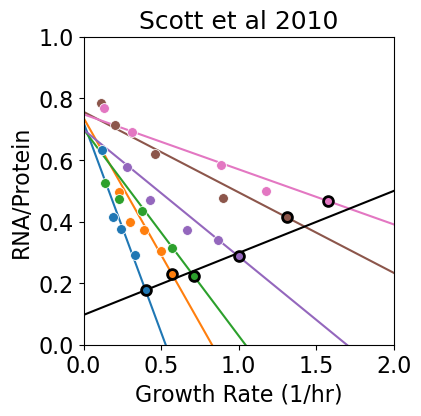

In [20]:
medium_color_dict = {'M63+glyc':'tab:blue', 'M63+gluc':'tab:orange', 'cAA+glyc':'tab:green',\
                     'cAA+gluc':'tab:purple', 'RDM+glyc':'tab:brown','RDM+gluc':'tab:pink'}

fig = plt.figure(figsize=(4,4))

plt.title("Scott et al 2010",fontsize=18)

grlinspace = np.linspace(0,2)
for medium in scott_data["Medium"].unique():
    scott_subset = scott_data[scott_data["Medium"]==medium]
    no_inhib_subset = scott_subset[scott_subset["Chlor Conc (μM)"] == 0]
    predicted_kn = inv_kn_growth_mm(no_inhib_subset["Growth rate λ (1/h)"].iloc[0])
    predicted_Rmax = no_inhib_subset["RNA/Protein (μg/μg)"].iloc[0] + (predicted_kn**-1)*no_inhib_subset["Growth rate λ (1/h)"].iloc[0]
    linear_model = scott_regs.loc[medium]
    knline = predicted_Rmax-(predicted_kn**-1)*grlinspace
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_subset,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-10,s=50,color=medium_color)
    sns.scatterplot(data = linear_model.to_frame().T,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-9,s=50,\
                    color=medium_color,edgecolor="black",linewidth=2)
    plt.plot(grlinspace,knline,color=medium_color,zorder=-13)
    
baseline_trace = baseline_model.predict(sm.add_constant(grlinspace[:,np.newaxis]))
plt.plot(grlinspace,baseline_trace,color="black",zorder=-12)

plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_RvsGR_kn_mm_model.png",dpi=300,bbox_inches="tight")

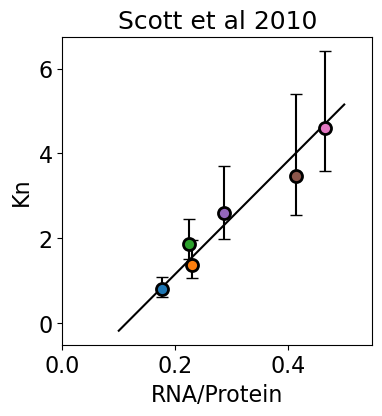

In [21]:
fig = plt.figure(figsize=(4,4))
plt.title("Scott et al 2010",fontsize=18)

rlinspace = np.linspace(0.1,0.5)
for medium in scott_data["Medium"].unique():
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_regs.loc[medium].to_frame().T,x="RNA/Protein (μg/μg)",y="Kn",zorder=-12,s=75,\
                   color=medium_color,edgecolor="black",linewidth=2)
    # Add error bars using plt.errorbar
    lower_err = scott_regs.loc[medium]["Kn"] - scott_regs.loc[medium]["Kn 95CI Lower"]
    upper_err = scott_regs.loc[medium]["Kn 95CI Upper"] - scott_regs.loc[medium]["Kn"]
    
    plt.errorbar(scott_regs.loc[medium]["RNA/Protein (μg/μg)"], scott_regs.loc[medium]["Kn"],\
                 yerr=np.array([lower_err,upper_err])[:,np.newaxis], fmt='none', ecolor='black', elinewidth=1.5, capsize=4, zorder=-13)

kn_trace = kn_model.predict(sm.add_constant(rlinspace[:,np.newaxis]))
plt.plot(rlinspace,kn_trace,color="black",zorder=-15)

plt.tick_params(axis="both", labelsize=16)
plt.ylabel("Kn",fontsize=16)
plt.xlabel("RNA/Protein",fontsize=16)
# plt.text(1,0.09,r"$H_{0}$ = " + f"{rna_prot_inactive:.2n}",horizontalalignment="center",\
#         verticalalignment="center",fontsize=16)
# plt.xlim(0,2)
plt.xlim(0,0.55)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_kn_RNA_rln.png",dpi=300,bbox_inches="tight")

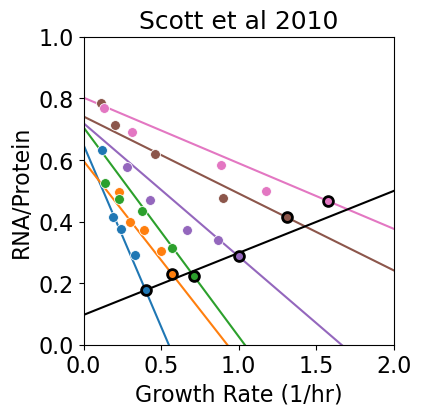

In [22]:
medium_color_dict = {'M63+glyc':'tab:blue', 'M63+gluc':'tab:orange', 'cAA+glyc':'tab:green',\
                     'cAA+gluc':'tab:purple', 'RDM+glyc':'tab:brown','RDM+gluc':'tab:pink'}

fig = plt.figure(figsize=(4,4))

plt.title("Scott et al 2010",fontsize=18)

grlinspace = np.linspace(0,2)
for medium in scott_data["Medium"].unique():
    scott_subset = scott_data[scott_data["Medium"]==medium]
    no_inhib_subset = scott_subset[scott_subset["Chlor Conc (μM)"] == 0]
    predicted_kn = kn_model.predict(np.array([1,no_inhib_subset["RNA/Protein (μg/μg)"].values[0]]))[0]
    predicted_Rmax = no_inhib_subset["RNA/Protein (μg/μg)"].iloc[0] + (predicted_kn**-1)*no_inhib_subset["Growth rate λ (1/h)"].iloc[0]
    linear_model = scott_regs.loc[medium]
    knline = predicted_Rmax-(predicted_kn**-1)*grlinspace
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_subset,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-10,s=50,color=medium_color)
    sns.scatterplot(data = linear_model.to_frame().T,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-9,s=50,\
                    color=medium_color,edgecolor="black",linewidth=2)
    plt.plot(grlinspace,knline,color=medium_color,zorder=-13)
    
baseline_trace = baseline_model.predict(sm.add_constant(grlinspace[:,np.newaxis]))
plt.plot(grlinspace,baseline_trace,color="black",zorder=-12)

plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_RvsGR_kn_model.png",dpi=300,bbox_inches="tight")

### Scott Data Mutants

In [23]:
scott_data_mutants = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Scott_2010_Table_S2.csv")

scott_regs_mutants = scott_data_mutants.groupby("Strain").apply(lambda x: skl.linear_model.LinearRegression().fit(\
                x["Growth rate λ (1/h)"].values[:,np.newaxis],x["RNA/Protein (μg/μg)"]))
Kt = scott_regs_mutants.apply(lambda x: 1/x.coef_[0])
scott_mutants_Rmin = scott_regs_mutants.apply(lambda x: x.intercept_)

scott_regs_mutants = Kt.to_frame().rename(columns={0:"Kt"})
scott_regs_mutants["Rmin"] = scott_mutants_Rmin

/tmp/ipykernel_112262/4148086834.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scott_regs_mutants = scott_data_mutants.groupby("Strain").apply(lambda x: skl.linear_model.LinearRegression().fit(\


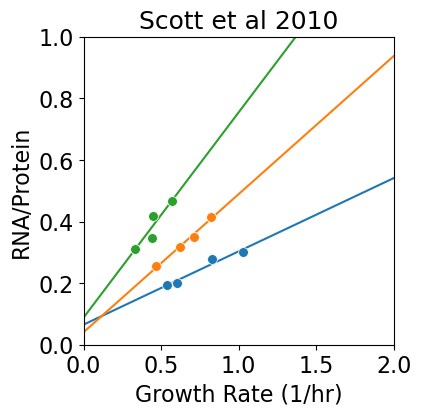

In [24]:
strain_color_dict = {'Xac':'tab:blue', 'SmR':'tab:orange', 'SmP':'tab:green'}

fig = plt.figure(figsize=(4,4))

plt.title("Scott et al 2010",fontsize=18)

grlinspace = np.linspace(0,2)
for strain in scott_data_mutants["Strain"].unique():
    scott_mutants_subset = scott_data_mutants[scott_data_mutants["Strain"]==strain]
    linear_model = scott_regs_mutants.loc[strain]
    ktline = linear_model["Rmin"] + (linear_model["Kt"]**-1)*grlinspace
    strain_color = strain_color_dict[strain]
    sns.scatterplot(data = scott_mutants_subset,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-10,s=50,color=strain_color)
    # sns.scatterplot(data = linear_model.to_frame().T,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-9,s=50,\
    #                 color=strain_color,edgecolor="black",linewidth=2)
    plt.plot(grlinspace,ktline,color=strain_color,zorder=-13)
    
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_RvsGR_mutants.png",dpi=300,bbox_inches="tight")

### (p)ppGpp vs Growth Scaling

In [25]:
R_max = 0.793 ## max ribosome levels
gr_ref = 2 ## reference growth rate
R_ref = 0.3 ## reference ribosome levels
R_0 = 0.03 ## based on dai data
k = 0.334 ## based on wu repressor function
e_max = 20 ##max elongatoin rate

def g_vs_gr_elong(gr,R_max=R_max,gr_ref=gr_ref,R_ref=R_ref,R_0=R_0,k=k,):
    ##setting constant based on argument (sketch)
    c_tau_d = ((R_max-R_ref)*k)/gr_ref
    alpha = c_tau_d/(R_max-R_0)
    phi = alpha*gr    
    g =  (phi/(1-phi/k))
    return g

g_ref = g_vs_gr_elong(gr_ref)

def g_vs_gr_charge(gr,g_ref=g_ref,gr_ref=gr_ref,e_max=e_max,R_0=R_0):
    g0 = g_ref*(1+(gr_ref/(e_max*R_0)))
    ##setting constant based on argument (sketch)
    g = g0/(1+gr/(e_max*R_0))

    return g

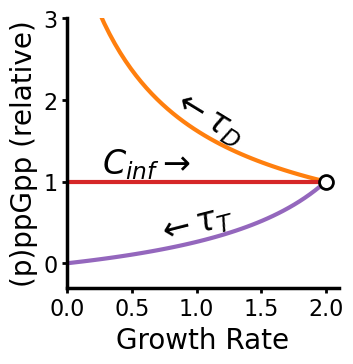

In [26]:
label_idx = 25
null_label_idx = 15

fig = plt.figure(figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)

lamb = np.linspace(0,gr_ref,num=50)
nutrient_line = g_vs_gr_charge(lamb)/g_ref
efg_line = g_vs_gr_elong(lamb)/g_ref
null_line = np.repeat(g_ref,len(lamb))/g_ref

line = plt.plot(lamb,efg_line,color=(0.5803921568627451, 0.403921568627451, 0.7411764705882353),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,nutrient_line,color=(1.0, 0.4980392156862745, 0.054901960784313725),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,null_line,color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),linewidth=3,zorder=-9)[0]
sns.scatterplot(x=[gr_ref],y=[g_ref/g_ref],zorder=10,s=100,color="white",linewidth=2,edgecolor="black")

plt.tick_params(axis="both", labelsize=16, width=2)
plt.xticks([0.,0.5,1.0,1.5,2.])
plt.yticks([0,1,2,3,4])
plt.ylabel("(p)ppGpp (relative)",fontsize=20)
plt.xlabel("Growth Rate",fontsize=20)
plt.xlim(0,2.1)
plt.ylim(-0.3,3)

ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine

dlamb = lamb[label_idx+1] - lamb[label_idx]
defg_line = efg_line[label_idx+1] - efg_line[label_idx]
dnutrient_line = nutrient_line[label_idx+1] - nutrient_line[label_idx]

rotn_efg_line = np.degrees(np.arctan2(defg_line, dlamb))
rotn_nutrient_line = np.degrees(np.arctan2(dnutrient_line, dlamb))

dnull_line = null_line[null_label_idx+1] - null_line[null_label_idx]
rotn_null_line = np.degrees(np.arctan2(dnull_line, dlamb))

plt.text(lamb[label_idx], efg_line[label_idx]+0.01, r"$\leftarrow \tau_{T}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_efg_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[label_idx], nutrient_line[label_idx]+0.01, r"$\leftarrow \tau_{D}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_nutrient_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[null_label_idx], null_line[null_label_idx]+0.01, r"$C_{inf} \rightarrow$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_null_line, rotation_mode='anchor', transform_rotates_text=True)

sns.despine()

plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/ppGpp_model_schematic.png",dpi=300,bbox_inches="tight")

### Growth Theory Schematic

In [27]:
lamb = np.linspace(0,gr_ref)
nutrient_slope = (R_ref-R_0)/gr_ref
efg_slope = (R_ref-R_max)/gr_ref

nutrient_line = R_0 + lamb*nutrient_slope
efg_line = R_max + lamb*efg_slope
null_line = np.repeat(R_ref,len(lamb))

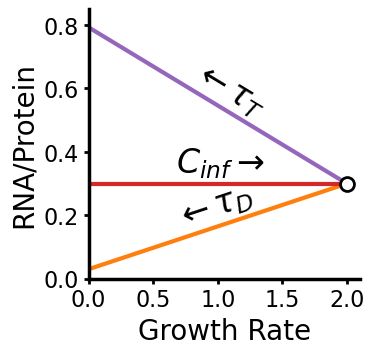

In [28]:
label_idx = 25
fig = plt.figure(figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)

line = plt.plot(lamb,efg_line,color=(0.5803921568627451, 0.403921568627451, 0.7411764705882353),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,nutrient_line,color=(1.0, 0.4980392156862745, 0.054901960784313725),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,null_line,color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),linewidth=3,zorder=-9)[0]
sns.scatterplot(x=[gr_ref],y=[R_ref],zorder=10,s=100,color="white",linewidth=2,edgecolor="black")

plt.tick_params(axis="both", labelsize=16, width=2)
plt.xticks([0.,0.5,1.0,1.5,2.0])
plt.yticks([0,0.2,0.4,0.6,0.8])
plt.ylabel("RNA/Protein",fontsize=20)
plt.xlabel("Growth Rate",fontsize=20)

ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine

dlamb = lamb[label_idx+1] - lamb[label_idx]
defg_line = efg_line[label_idx+1] - efg_line[label_idx]
dnutrient_line = nutrient_line[label_idx+1] - nutrient_line[label_idx]
dnull_line = null_line[label_idx+1] - null_line[label_idx]

rotn_efg_line = np.degrees(np.arctan2(defg_line, dlamb))
rotn_nutrient_line = np.degrees(np.arctan2(dnutrient_line, dlamb))
rotn_null_line = np.degrees(np.arctan2(dnull_line, dlamb))

plt.text(lamb[label_idx], efg_line[label_idx]+0.01, r"$\leftarrow \tau_{T}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_efg_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[label_idx], nutrient_line[label_idx]+0.01, r"$\leftarrow \tau_{D}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_nutrient_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[label_idx], null_line[label_idx]+0.01, r"$C_{inf} \rightarrow$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_null_line, rotation_mode='anchor', transform_rotates_text=True)

sns.despine()

plt.xlim(0,2.1)
plt.ylim(0,0.85)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/growth_model_schematic.png",dpi=300,bbox_inches="tight")

### Queueing Theory and RelA Deletion

In [29]:
import numpy as np
from scipy.stats import nbinom, rv_discrete
import matplotlib.pyplot as plt
from scipy.stats import nbinom

M=1

def truncated_nbin(rho,M=M):
    # Define x values for x = 0, 1, ..., M-1
    x_values = np.arange(0, M)
    # Original pmf for x < M
    pmf_values = nbinom.pmf(x_values, 1, 1 - rho)
    # Compute tail mass for x >= M
    tail_mass = 1 - nbinom.cdf(M-1, 1, 1 - rho)
    
    # Final x values include the truncation point M
    x_final = np.append(x_values, M)
    pmf_final = np.append(pmf_values, tail_mass)
    
    # Create the custom discrete distribution
    truncated_dist = rv_discrete(name='truncated_nbinom', values=(x_final, pmf_final))
    return truncated_dist

##10 aa/s
def compute_tau_t_avg(tau_d_kd,tau_t_0=(1/20),tau_d_0=(1/20),init_rate=1,M=M):
    queue_rho = init_rate*tau_d_kd
    if queue_rho<1:
        queue_dist = truncated_nbin(queue_rho,M=M)
        n_in_queue = 0
        for i in range(1,M+1):
            n_in_queue += (i*queue_dist.pmf(i))
    else:
        n_in_queue = M
    normal_ribosomes = (19-n_in_queue)*tau_t_0
    queuing_ribosomes = n_in_queue*tau_d_kd
    # nonqueueing_ribosomes = (M-n_in_queue)*tau_t_0
    hungry_ribosome = tau_t_0
    tau_t_avg = (normal_ribosomes+queuing_ribosomes+hungry_ribosome)/20
    return(tau_t_avg)

def compute_tau_d_avg(tau_d_kd,tau_t_0=(1/20),tau_d_0=(1/20),init_rate=1):
    tau_d_avg = ((19*tau_d_0)+tau_d_kd)/20
    return tau_d_avg

def compute_tau_d_sq_avg(tau_d_kd,tau_t_0=(1/20),tau_d_0=(1/20),init_rate=1):
    tau_d_sq_avg = ((19*(tau_d_0**2))+(tau_d_kd**2))/20
    return tau_d_sq_avg

In [134]:
phi_R_0 = 0.2
(phi_R_0*(eps_0/m_r))*3600

1.9629225736095965

In [142]:
# tau_d_0=(1/10)
# tau_t_0=(1/40)
tau_d_0=(1/25)
tau_t_0=(1/100)

eps_0 = (tau_d_0 + tau_t_0)**-1 ## 20 aa/sec
m_r = 7336 ##aa/molecule
phi_R_0 = 0.2

initial_gr = (phi_R_0*(eps_0/m_r))*3600
init_rate = 0.5
tau_d_kd_arr = np.logspace(-2,3,num=500)

tau_d_avg = np.array([compute_tau_d_avg(item,tau_t_0=tau_t_0,tau_d_0=tau_d_0,init_rate=init_rate) for item in tau_d_kd_arr])
tau_d_sq_avg = np.array([compute_tau_d_sq_avg(item,tau_t_0=tau_t_0,tau_d_0=tau_d_0,init_rate=init_rate) for item in tau_d_kd_arr])

tau_t_avg = np.array([compute_tau_t_avg(item,tau_t_0=tau_t_0,tau_d_0=tau_d_0,init_rate=init_rate) for item in tau_d_kd_arr])
tau_t_avg_noqueue = np.array([tau_t_0 for item in tau_d_kd_arr])

elongation_rate_avg = (tau_d_avg + tau_t_avg)**-1
elongation_rate_avg_no_queue = (tau_d_avg + tau_t_avg_noqueue)**-1

gr_approx = (phi_R_0*(elongation_rate_avg/m_r))*3600

gr_approx_no_queue = (phi_R_0*(elongation_rate_avg_no_queue/m_r))*3600

g_WT_no_queue = (tau_d_avg/tau_t_avg_noqueue)
g_WT_no_queue = g_WT_no_queue/g_WT_no_queue[0]

g_WT = (tau_d_avg/tau_t_avg)
g_WT = g_WT/g_WT[0]

g_sq = (tau_d_sq_avg/tau_t_avg)
g_sq = g_sq/g_sq[0]

tau_d_kd_max_queue = 1/init_rate

eps_max_queue = ((compute_tau_d_avg(tau_d_kd_max_queue,tau_t_0=tau_t_0,tau_d_0=tau_d_0,init_rate=init_rate) +\
                     compute_tau_t_avg(tau_d_kd_max_queue,tau_t_0=tau_t_0,tau_d_0=tau_d_0,init_rate=init_rate))**-1)

gr_max_queue = (phi_R_0*(eps_max_queue/m_r))*3600

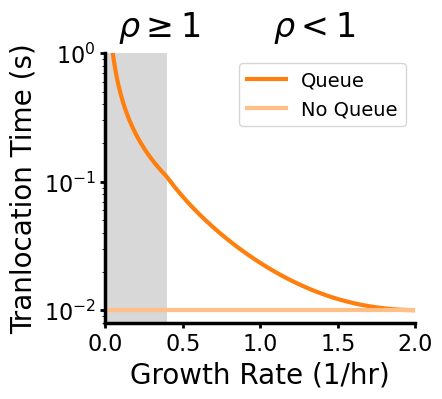

In [143]:
fig = plt.figure(figsize=(4,3.5))
ax = plt.subplot(1,1,1)

# plt.plot(gr_approx,tau_d_avg)
line = plt.plot(gr_approx,tau_t_avg,color=(1.0, 0.4980392156862745, 0.054901960784313725),linewidth=3,zorder=-10,label="Queue")
line = plt.plot(gr_approx_no_queue,tau_t_avg_noqueue,color=(1.0, 0.749, 0.527),linewidth=3,zorder=-10,label="No Queue")
plt.fill_betweenx([0,tau_t_avg[-1]],0,gr_max_queue,zorder=-11,color="grey",alpha=0.3,edgecolor="none")
plt.text(0.35, 1.15, r"$\rho \geq 1$", ha='center', va='bottom', fontsize=24)
plt.text(1.35, 1.15, r"$\rho < 1$", ha='center', va='bottom', fontsize=24)

plt.xlim(0,2)
plt.ylim(0.008,1)
plt.yscale("log")

plt.ylabel("Tranlocation Time (s)",fontsize=20)
plt.xlabel("Growth Rate (1/hr)",fontsize=20)

plt.tick_params(axis="both", labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine
plt.legend(fontsize=14)
sns.despine()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/queueing_figure_1.png",dpi=300,bbox_inches="tight")

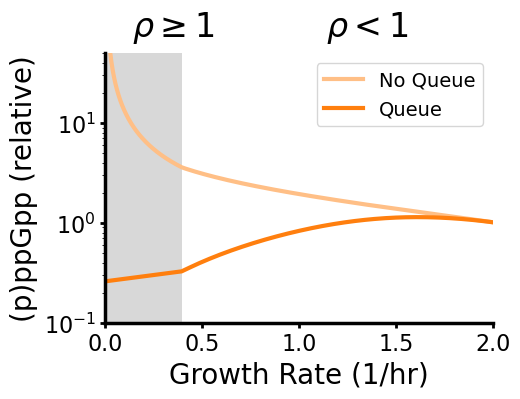

In [144]:
fig = plt.figure(figsize=(5,3.5))
ax = plt.subplot(1,1,1)

line = plt.plot(gr_approx,g_WT_no_queue,color=(1.0, 0.749, 0.527),linewidth=3,zorder=-10,label="No Queue")
line = plt.plot(gr_approx,g_WT,color=(1.0, 0.4980392156862745, 0.054901960784313725),linewidth=3,zorder=-10,label="Queue")
# line = plt.plot(gr_approx,g_sq,color="tab:green",linewidth=3,zorder=-10,label="Nonlinear + Queue")

plt.fill_betweenx([0,g_sq[-1]],0,gr_max_queue,zorder=-11,color="grey",alpha=0.3,edgecolor="none")
plt.text(0.35, 60, r"$\rho \geq 1$", ha='center', va='bottom', fontsize=24)
plt.text(1.35, 60, r"$\rho < 1$", ha='center', va='bottom', fontsize=24)

plt.xlim(0,2)
plt.ylim(0.1,50)
plt.yscale("log")

plt.ylabel("(p)ppGpp (relative)",fontsize=20)
plt.xlabel("Growth Rate (1/hr)",fontsize=20)

plt.tick_params(axis="both", labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine
plt.legend(fontsize=14)
sns.despine()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/queueing_figure_2.png",dpi=300,bbox_inches="tight")

### Non-linear RelA Activity

In [145]:
t_KD_tot = np.logspace(0,2,num=3)
Km = np.logspace(-1,1,num=3)
eps = np.linspace(0,eps_0)

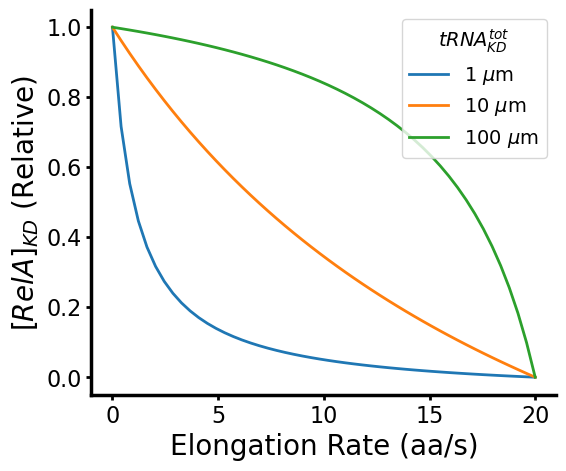

In [146]:
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)

for i in range(3):
    RelA_KD = (t_KD_tot[i]*(eps_0 - eps))/((19*Km[1]*eps) + (t_KD_tot[i]*(eps_0 - eps)))
    plt.plot(eps,RelA_KD,label=str(int(np.round(t_KD_tot[i],decimals=0))) + r" $\mu$m", linewidth=2)

plt.xlabel("Elongation Rate (aa/s)",fontsize=20)
plt.ylabel(r"$[RelA]_{KD}$ (Relative)",fontsize=20)

plt.tick_params(axis="both", labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine

plt.legend(title=r"$tRNA_{KD}^{tot}$",fontsize=14,title_fontsize=14)
sns.despine()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/varying_tRNA_tot.png",dpi=300,bbox_inches="tight")
# fig = plt.figure(figsize=(6,5))
# ax = plt.subplot(1,1,1)

# for i in range(3):
#     RelA_KD = (t_KD_tot[1]*(eps_0 - eps))/((19*Km[i]*eps) + (t_KD_tot[1]*(eps_0 - eps)))
#     plt.plot(eps,RelA_KD,label=str(np.round(Km[i], decimals=1)) + r" $\mu$m", linewidth=2)

# plt.xlabel("Elongation Rate (aa/s)",fontsize=20)
# plt.ylabel(r"$[RelA]_{KD}$ (Relative)",fontsize=20)

# plt.tick_params(axis="both", labelsize=16, width=2)
# ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
# ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine

# plt.legend(title=r"tRNA Syn Km",fontsize=14,title_fontsize=14)
# sns.despine()
# plt.show()

In [147]:
g_queue_relA = ((tau_d_kd_arr/tau_t_avg)*(1 - (elongation_rate_avg/elongation_rate_avg[0]))) + 1
g_queue_relA = g_queue_relA/g_queue_relA[0]

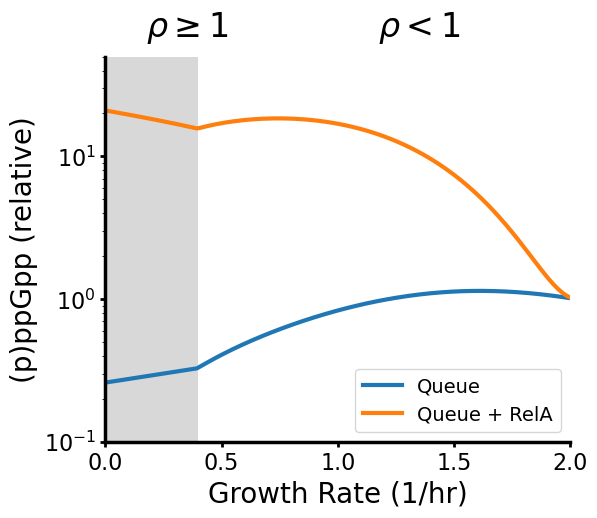

In [148]:
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)

plt.plot(gr_approx,g_WT,linewidth=3,zorder=-10,label="Queue")
plt.plot(gr_approx,g_queue_relA,linewidth=3,zorder=-10,label="Queue + RelA")

plt.fill_betweenx([0,g_sq[-1]],0,gr_max_queue,zorder=-11,color="grey",alpha=0.3,edgecolor="none")
plt.text(0.35, 60, r"$\rho \geq 1$", ha='center', va='bottom', fontsize=24)
plt.text(1.35, 60, r"$\rho < 1$", ha='center', va='bottom', fontsize=24)

plt.xlim(0,2)
plt.ylim(0.1,50)
plt.yscale("log")

plt.ylabel("(p)ppGpp (relative)",fontsize=20)
plt.xlabel("Growth Rate (1/hr)",fontsize=20)

plt.tick_params(axis="both", labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine
plt.legend(fontsize=14)
sns.despine()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/RelA_Model.png",dpi=300,bbox_inches="tight")